In [37]:
from neurodiffeq import diff
from neurodiffeq.solvers import Solver1D, Solver2D
from neurodiffeq.conditions import IVP, DirichletBVP2D
from neurodiffeq.networks import FCNN, SinActv, Resnet
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import torch
import torch.nn as nn
from neurodiffeq.generators import Generator1D
import math
from neurodiffeq.monitors import Monitor1D
import IPython

In [38]:
alpha_0 = 2
alpha_1 = 1
c2 = alpha_0/(12*alpha_1)
c3 = 1.0
c2

0.16666666666666666

Training Progress:   0%|                              | 0/10000 [00:00<?, ?it/s]

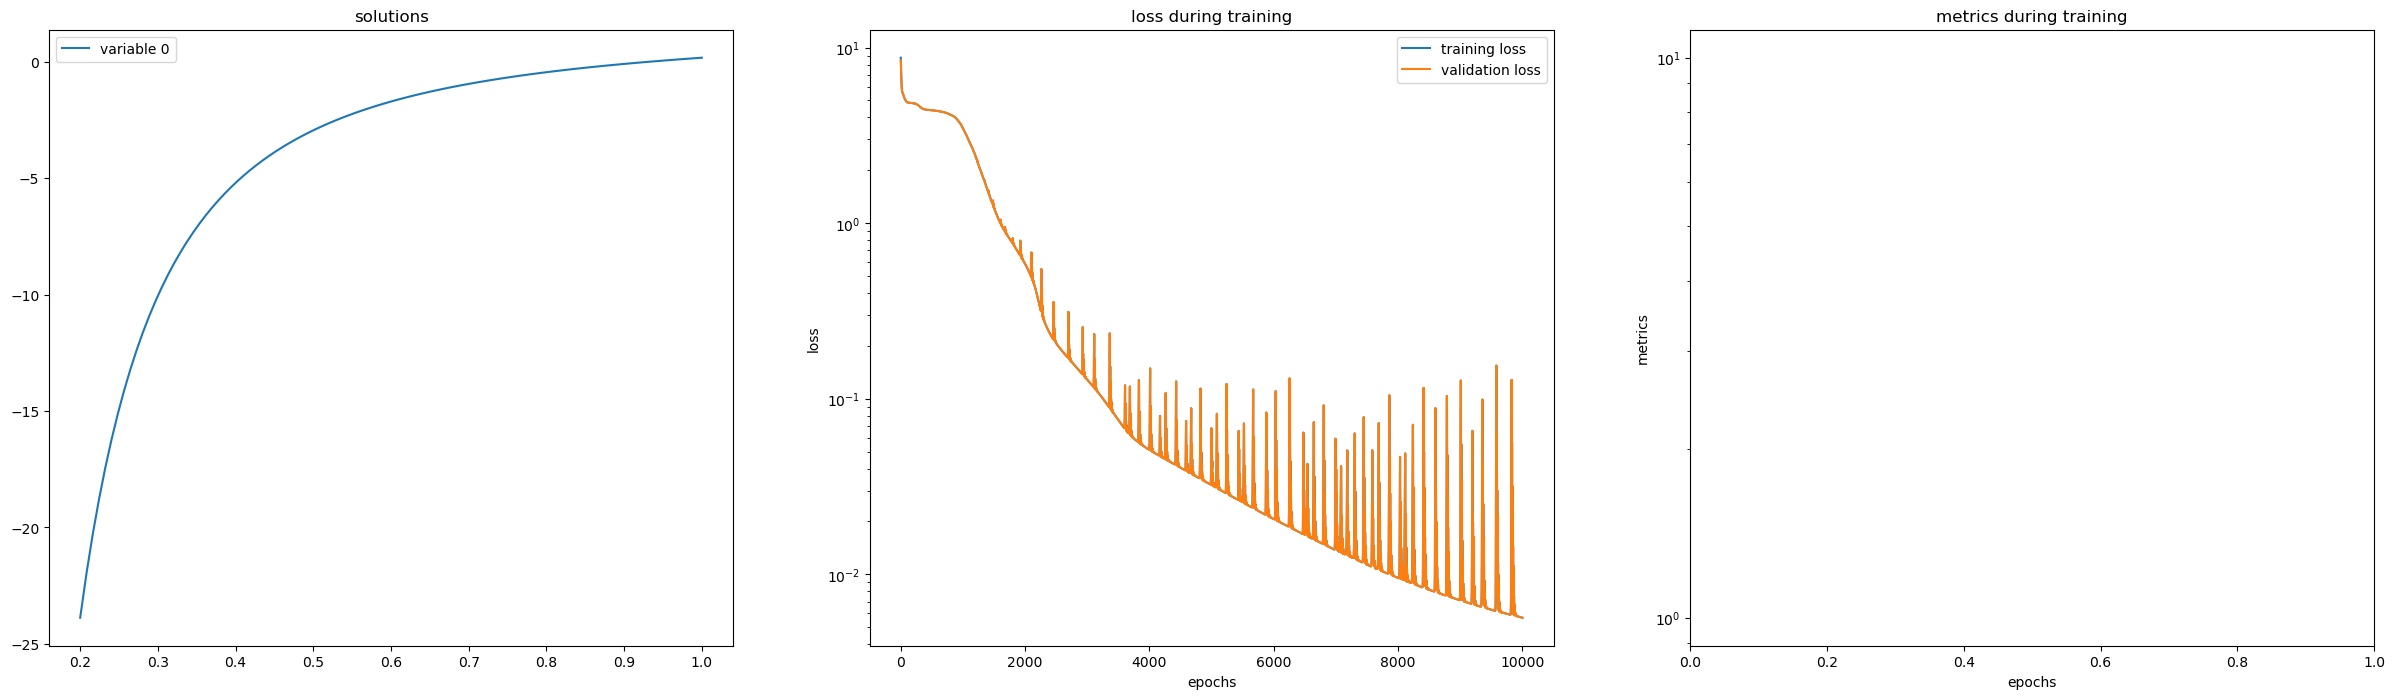

In [39]:
def ode_system(A, t): 
    # return [torch.pow(t,2)*A*(diff(torch.log(A),t,order = 2) + diff(torch.log(A),t)*(((4+t)/(2*t)) + 3*diff(torch.log(A),t)/2)) - (torch.pow(t,2)*A/2)*(torch.pow(diff(torch.log(A),t),2) + ((4+t)/t)*diff(torch.log(A),t) - (4/t)*(1/t+2)) - 2*(1+(alpha_0*torch.pow(t,2))/(2*alpha_1))]
    return [alpha_1*diff(A,t,order=2)*torch.pow(t,2) - torch.pow(t,2)*alpha_0 + 4*t*alpha_1*diff(A,t) + 2*A*alpha_1 - 2*alpha_1]

conditions = [IVP(t_0=1.0, u_0=1.0+c2-c3, u_0_prime=2*c2+2*c3)]
# conditions = [ IVP(t_0=2.0, u_0=1.0+4*c2-c3/4, u_0_prime=4*c2+c3/4)]
# conditions = [IVP(t_0=1.0, u_0=1.0+c2-c3, u_0_prime=2*c2+2*c3), IVP(t_0=2.0, u_0=1.0+4*c2-c3/4, u_0_prime=4*c2+c3/4)]

# g1 = Generator1D(size=64,  t_min=0.1, t_max=1.0, method='uniform')
# nets = [FCNN(actv=SinActv), FCNN(actv=SinActv)]
# nets = [FCNN(actv=nn.Tanh), FCNN(actv=nn.Tanh)]
# nn.LeakyReLU
nets = [FCNN(actv=SinActv)]
# nets = [FCNN(actv=nn.Tanh)]
g1 = Generator1D(size=2048, t_min=0.2, t_max=1.0, method='equally-spaced')
monitor = Monitor1D(t_min=0.2, t_max=1.0, check_every=10000)
solver = Solver1D(ode_system, conditions, t_min=0.2, t_max=1.0, nets = nets, train_generator=g1, valid_generator=g1)
solver.fit(max_epochs=10000, callbacks = [monitor.to_callback()])
solution = solver.get_solution()

In [40]:
t = np.linspace(0.2, 1.0, 10000)
A_nn = solution(t, to_numpy=True)

In [41]:
# lamb_an = np.log(t/(t-1+1/math.e))
A_an = 1+c2*(t**2)-(c3/(t**2))

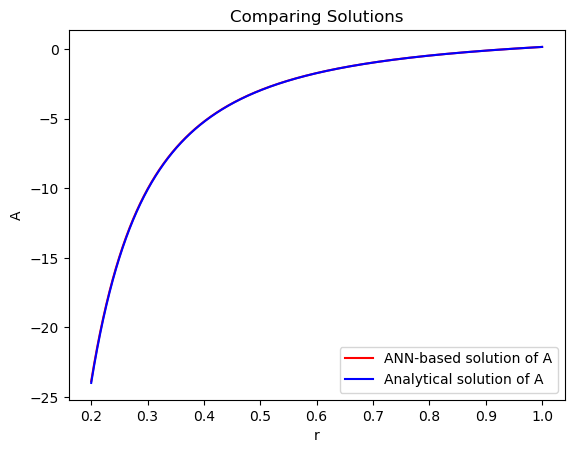

In [44]:
plt.title("Comparing Solutions")
plt.ylabel('A')
plt.xlabel('r')
plt.plot(t, A_nn, label='ANN-based solution of A', color = 'r')
plt.plot(t, A_an,label='Analytical solution of A', color = 'b')
plt.legend()
plt.savefig('lambda')
plt.show()

In [45]:
lambda_error = np.sqrt(np.mean((A_nn-A_an)**2))
print("Mean square error in lambda is", lambda_error)

Mean square error in lambda is 0.028706740418999725


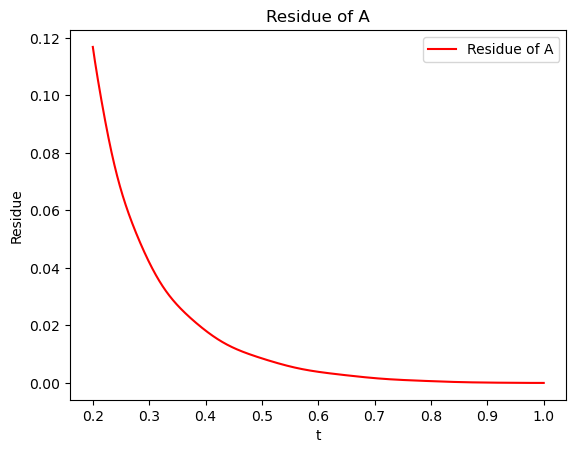

In [46]:
plt.title("Residue of A")
plt.ylabel('Residue')
plt.xlabel('t')
plt.plot(t, A_nn-A_an, label='Residue of A', color = 'r')
plt.legend()
plt.savefig('SchwarzschildResidue')
plt.show()

In [76]:
1.0+4*c2-c3/4

1.4166666666666665

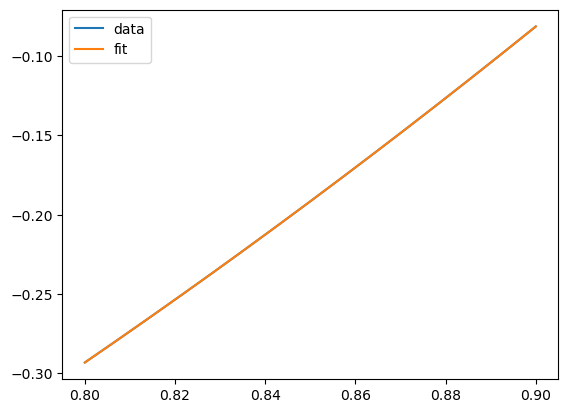

In [12]:
A_n4 = A_nn*(t**2)

poly = np.polyfit(t, A_n4, deg=4)

fig, ax = plt.subplots()
ax.plot(t,A_n4, label='data')
ax.plot(t,np.polyval(poly, t), label='fit')
ax.legend()

In [13]:
poly

array([ 0.15816873,  0.04127439,  0.93157964,  0.05613685, -1.02021354])

In [58]:
15.571215797756755

15.571215797756755